# Physics 404/604

## Computational Physics (Spring 2019)

## BPB-250, Mon./Wed. 1:00-2:15 pm

| Instructor | Prof. Zhaohuan Zhu                 |
| ---------- | :--------------------------------- |
| Email      | zhaohuan.zhu@unlv.edu              |
| Website    | http://www.physics.unlv.edu/~zhzhu |
| Office     | BPB 245                            |






# 1. Programing Style: Efficient Algorithm


## 1.1 Programming guide
* Give the correct answers
* clear and easy to read (including documenting itself)
* easy to use
* built up out of small programs that can be tested individually easy to modify and robust  
* Try to use efficient algorithm





## 1.2 Efficient ways to calculate Fibonacci numbers

Fibonacci number
The number series: 1, 1, 2, 3, 5, 8, 13, 21, 34, …
\begin{equation}
F_{n}=F_{n-1}+F_{n-2}
\end{equation}
What is $F_{n}$?

Solution: there is an analytical solution
\begin{equation}
F_{n}=\frac{\phi^{n}-(1-\phi)^n}{\sqrt{5}}
\end{equation}
where $\phi=\frac{1+\sqrt(5)}{2}$  


### 1.3.1 Direct Calculation:

In [1]:
import numpy as np
def fib1(n):
    phi=(1.+np.sqrt(5))/2.
    return (phi**n-(1.-phi)**n)/np.sqrt(5.)

In [2]:
import time
start_time = time.time()
print(fib1(40))
print("--- %s seconds ---" % (time.time() - start_time))
start_time = time.time()


102334155.00000013
--- 0.0010004043579101562 seconds ---


Dynamic Programming:  
An algorithmic paradigm that solves a complex problem by breaking it into subproblems and stores the results of subproblems to avoid computing the same results again.

### 1.3.2 Recursion method:

In [3]:
# Recursion
def fib2(n):      # extremely simple, but exponentially running time, very slow for large n, n cannot too large (stack limit)
    if n == 0: return 0
    elif n == 1: return 1
    else: return fib2(n-1) + fib2(n-2)  # Please finish this line

In [4]:
import time
start_time = time.time()
print(fib2(40))
print("--- %s seconds ---" % (time.time() - start_time))

102334155
--- 42.22549748420715 seconds ---


### 1.3.3 Memorization method (Top down):

In [5]:
def fib3(n, table): # Store the data we already calculated, linear space and time complexity, but still have the stack limit
    if n == 0 or n==1:
        table[n]=n
    
    # if the value has not been calculated, calculate it 
    if table[n] is None:
        # Please finish this line
        table[n] = fib3(n-1, table) + fib3(n-2, table)
    return table[n]

In [6]:
import time
n=40
table = [None]*(n+1)
start_time = time.time()
print(fib3(n, table))
print("--- %s seconds ---" % (time.time() - start_time))
n=1400
table = [None]*(n+1)
start_time = time.time()
print(fib3(n, table))
print("--- %s seconds ---" % (time.time() - start_time))
n=2000
table = [None]*(n+1)
start_time = time.time()
print(fib3(n, table))
print("--- %s seconds ---" % (time.time() - start_time))

102334155
--- 0.0 seconds ---
17108476902340227241249719513231821477382749898026920041550883749834348017250935801359315038923367841494936038231522506358371361016671790887791259870264957823133253627917432203111969704623229384763490617075388642696139893354058660570399927047816296952516330636633851111646387885472698683607925
--- 0.0009980201721191406 seconds ---
4224696333392304878706725602341482782579852840250681098010280137314308584370130707224123599639141511088446087538909603607640194711643596029271983312598737326253555802606991585915229492453904998722256795316982874482472992263901833716778060607011615497886719879858311468870876264597369086722884023654422295243347964480139515349562972087652656069529806499841977448720155612802665404554171717881930324025204312082516817125
--- 0.0029892921447753906 seconds ---


### 1.3.4  Tabulation Method (bottom-up)


In [7]:
def fib4(n):
    table=[0]*(n+1)
    table[1] = 1
    
    for i in range(2,n+1):
        # Please finish this line
        table[i] = table[i-1] + table[i-2]
    return table[n]

In [8]:
import time
start_time = time.time()
print(fib4(40))
print("--- %s seconds ---" % (time.time() - start_time))
start_time = time.time()
print(fib4(14000)) # 1500 too much
print("--- %s seconds ---" % (time.time() - start_time))

102334155
--- 0.0 seconds ---
3002468761178461090995494179715025648692747937490792943468375429502230242942284835863402333575216217865811638730389352239181342307756720414619391217798542575996541081060501905302157019002614964717310808809478675602711440361241500732699145834377856326394037071666274321657305320804055307021019793251762830816701587386994888032362232198219843549865275880699612359275125243457132496772854886508703396643365042454333009802006384286859581649296390803003232654898464561589234445139863242606285711591746222880807391057211912655818499798720987302540712067959840802106849776547522247429904618357394771725653253559346195282601285019169360207355179223814857106405285007997547692546378757062999581657867188420995770650565521377874333085963123444258953052751461206977615079511435862879678439081175536265576977106865074099512897235100538241196445815568291377846656352979228098911566675956525644182645608178603837172227838896725425605719942300037650526231486881066037397866942013838296

### 1.3.5 Using Matrix Algebra

$$\left[\begin{array}
{rr}
1 & 1 \\
1 & 0 \\
\end{array}\right]^n=\left[\begin{array}
{rr}
F(n+1) & F(n) \\
F(n) & F(n-1) \\
\end{array}\right]
$$

What is the fastest way to calculate $3.14^{100}$?

In [9]:
def arrpow(arr, n):
    yarr=arr
    if n<1:
        print('n needs to be larger than 1')
    if n==1:
        return arr
    yarr = arrpow(arr, n//2)
    yarr = [[yarr[0][0]*yarr[0][0]+yarr[0][1]*yarr[1][0],yarr[0][0]*yarr[0][1]+yarr[0][1]*yarr[1][1]],
            [yarr[1][0]*yarr[0][0]+yarr[1][1]*yarr[1][0],yarr[1][0]*yarr[0][1]+yarr[1][1]*yarr[1][1]]]
    if n%2:
        yarr=[[yarr[0][0]*arr[0][0]+yarr[0][1]*arr[1][0],yarr[0][0]*arr[0][1]+yarr[0][1]*arr[1][1]],
            [yarr[1][0]*arr[0][0]+yarr[1][1]*arr[1][0],yarr[1][0]*arr[0][1]+yarr[1][1]*arr[1][1]]]
    return yarr

def fib5(n):
    arr= [[1,1],[1,0]]
    f=arrpow(arr,n-1)[0][0]
    return f
    



In [10]:
import time
start_time = time.time()
print(fib5(40))
print("--- %s seconds ---" % (time.time() - start_time))
import time
start_time = time.time()
print(fib5(14000)) # 93 overflow
print("--- %s seconds ---" % (time.time() - start_time))

102334155
--- 0.0 seconds ---
3002468761178461090995494179715025648692747937490792943468375429502230242942284835863402333575216217865811638730389352239181342307756720414619391217798542575996541081060501905302157019002614964717310808809478675602711440361241500732699145834377856326394037071666274321657305320804055307021019793251762830816701587386994888032362232198219843549865275880699612359275125243457132496772854886508703396643365042454333009802006384286859581649296390803003232654898464561589234445139863242606285711591746222880807391057211912655818499798720987302540712067959840802106849776547522247429904618357394771725653253559346195282601285019169360207355179223814857106405285007997547692546378757062999581657867188420995770650565521377874333085963123444258953052751461206977615079511435862879678439081175536265576977106865074099512897235100538241196445815568291377846656352979228098911566675956525644182645608178603837172227838896725425605719942300037650526231486881066037397866942013838296

# 2. How to represent numbers?



## 2.1 Integers:   

 [$-2^{n-1}$, $2^{n-1}$] where n is the number of bits used to store the signed integer
      
      Note that in python2 integer is either 4 bytes or 8 bytes. In python 3, integer can be any length as long as the memory allows. On the otherhand, some python libraries (e.g. numpy) donot support these very long integers. Remember only 19 digets integer

In [11]:
import numpy as np
a=np.array([2**63-1])
print(a.dtype)
print(a,bin(a[0]))
print(a+1,bin(a[0]+1))
    

int64
[9223372036854775807] 0b111111111111111111111111111111111111111111111111111111111111111
[-9223372036854775808] -0b1000000000000000000000000000000000000000000000000000000000000000


C:\Users\luojiawei\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: overflow encountered in longlong_scalars
  """


## 2.2 Floating point numbers:

8 bytes  
One number in the memory   
ABBBBBBBBBBBCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCC

A: sign  
B: e  
C: $b_{52-i}$
i is the bit of C; the i of the leftmost C is 1; the i of the rightmost C is 52.

\begin{equation}  
x=(-1)^{sign}(1+\sum_{i=1}^{52} b_{52-i}2^{-i})2^{e-1023}
\end{equation}

In [12]:
import random
import numpy as np
import struct

In [13]:
def fextract(num):
    return ''.join(bin(c).replace('0b', '').rjust(8, '0') for c in struct.pack('!d', num))

In [14]:
num=1.0
print("%.31f  %s"%(num,fextract(num)[0]+' '+fextract(num)[1:12]+' '+fextract(num)[12:]))

1.0000000000000000000000000000000  0 01111111111 0000000000000000000000000000000000000000000000000000


In [15]:
num=0.5
print("%.31f  %s"%(num,fextract(num)[0]+' '+fextract(num)[1:12]+' '+fextract(num)[12:]))

0.5000000000000000000000000000000  0 01111111110 0000000000000000000000000000000000000000000000000000


In [16]:
num=0.75
print("%.31f  %s"%(num,fextract(num)[0]+' '+fextract(num)[1:12]+' '+fextract(num)[12:]))

0.7500000000000000000000000000000  0 01111111110 1000000000000000000000000000000000000000000000000000


In [17]:
num=0.2
print("%.31f  %s"%(num,fextract(num)[0]+' '+fextract(num)[1:12]+' '+fextract(num)[12:]))

0.2000000000000000111022302462516  0 01111111100 1001100110011001100110011001100110011001100110011010


In [18]:
# Left association is important !!! Keep this in mind when you are dealing with round-off errors.

num=0.2+1.9-0.3
print("%.31f  %s"%(num,fextract(num)[0]+' '+fextract(num)[1:12]+' '+fextract(num)[12:]))


num=1.9+0.2-0.3
print("%.31f  %s"%(num,fextract(num)[0]+' '+fextract(num)[1:12]+' '+fextract(num)[12:]))


num=0.2-0.3+1.9
print("%.31f  %s"%(num,fextract(num)[0]+' '+fextract(num)[1:12]+' '+fextract(num)[12:]))

# A+B-C does not equal A-C+B

1.8000000000000000444089209850063  0 01111111111 1100110011001100110011001100110011001100110011001101
1.8000000000000000444089209850063  0 01111111111 1100110011001100110011001100110011001100110011001101
1.7999999999999998223643160599750  0 01111111111 1100110011001100110011001100110011001100110011001100


Range 

[-$10^{308}$, -$10^{-324}$] [$10^{-324}$,10$^{308}$]

In [19]:
num=1.e-325 #underflow sometimes is treated as 0
print("%.19e  %s"%(num,fextract(num)[0]+' '+fextract(num)[1:12]+' '+fextract(num)[12:]))

0.0000000000000000000e+00  0 00000000000 0000000000000000000000000000000000000000000000000000


In [20]:
num=1.e-323
print("%.19e  %s"%(num,fextract(num)[0]+' '+fextract(num)[1:12]+' '+fextract(num)[12:]))

9.8813129168249308835e-324  0 00000000000 0000000000000000000000000000000000000000000000000010


In [21]:
num=1.e309 #overflow generates infinity
print("%.19e  %s"%(num,fextract(num)[0]+' '+fextract(num)[1:12]+' '+fextract(num)[12:]))

inf  0 11111111111 0000000000000000000000000000000000000000000000000000


In [22]:
num=1.7976931348e308 #overflow generates infinity
print("%.19e  %s"%(num,fextract(num)[0]+' '+fextract(num)[1:12]+' '+fextract(num)[12:]))

1.7976931347999999853e+308  0 11111111110 1111111111111111111111111111111110110011110001011011


In [23]:
# Write a code to determine the overflow and underflow limit to be accurate by a factor 2

under =1.
underflow = overflow = False
over =1.
for i in range(1100):
    if underflow is False:
        under = under / 2
        if fextract(under)[1:12] == '00000000000' and fextract(under)[12:]== '0000000000000000000000000000000000000000000000000001':
            print("Underflow! %.19e  %s"%(under,fextract(under)[0]+' '+fextract(under)[1:12]+' '+fextract(under)[12:]))
            underflow = True
    if overflow is False:
        over = over * 2
        if fextract(over)[1:12] == '11111111110':
            print("Overflow! %.19e  %s"%(over,fextract(over)[0]+' '+fextract(over)[1:12]+' '+fextract(over)[12:]))
            overflow = True
    if overflow and underflow: break

Overflow! 8.9884656743115795386e+307  0 11111111110 0000000000000000000000000000000000000000000000000000
Underflow! 4.9406564584124654418e-324  0 00000000000 0000000000000000000000000000000000000000000000000001


Machine Precision: 

In [24]:
num=1.0e-17
print("%.31f  %s"%(num,fextract(num)[0]+' '+fextract(num)[1:12]+' '+fextract(num)[12:]))

0.0000000000000000100000000000000  0 01111000110 0111000011101111010101000110010001101101010010010111


In [25]:
num=1.0+1.0e-17
print("%.31f  %s"%(num,fextract(num)[0]+' '+fextract(num)[1:12]+' '+fextract(num)[12:]))

1.0000000000000000000000000000000  0 01111111111 0000000000000000000000000000000000000000000000000000


In [26]:
num1 = 100.1
num2= 100.1+100.*1.0e-17
print("%.31f %.31f"%(num1,num2))

100.0999999999999943156581139191985 100.0999999999999943156581139191985


In [27]:
# determine your machine's precision

N = 100
eps =1.0

for i in range(N):
    eps = eps/2
    if 1+eps == 1:
        print('i=%d' %(i))
        break
    else:
        print(1+eps)

1.5
1.25
1.125
1.0625
1.03125
1.015625
1.0078125
1.00390625
1.001953125
1.0009765625
1.00048828125
1.000244140625
1.0001220703125
1.00006103515625
1.000030517578125
1.0000152587890625
1.0000076293945312
1.0000038146972656
1.0000019073486328
1.0000009536743164
1.0000004768371582
1.000000238418579
1.0000001192092896
1.0000000596046448
1.0000000298023224
1.0000000149011612
1.0000000074505806
1.0000000037252903
1.0000000018626451
1.0000000009313226
1.0000000004656613
1.0000000002328306
1.0000000001164153
1.0000000000582077
1.0000000000291038
1.000000000014552
1.000000000007276
1.000000000003638
1.000000000001819
1.0000000000009095
1.0000000000004547
1.0000000000002274
1.0000000000001137
1.0000000000000568
1.0000000000000284
1.0000000000000142
1.000000000000007
1.0000000000000036
1.0000000000000018
1.0000000000000009
1.0000000000000004
1.0000000000000002
i=52


In [28]:
# error in operations

num1 = 0.1
num2 = 0.2
num3 = 0.3
print("%.31f %.31f %.31f %.31f"%(num1,num2, num1+num2, num3))
print(" the relative of the difference is ",abs((num1+num2)/num3-1))

0.1000000000000000055511151231258 0.2000000000000000111022302462516 0.3000000000000000444089209850063 0.2999999999999999888977697537484
 the relative of the difference is  2.220446049250313e-16


num1 = 0.2000000000001
num2 = 0.2
num3 = 0.0000000000001
print("%.31f %.31f %.31f %.31f"%(num1,num2, num1-num2, num3))
print(" the relative of the difference is ",abs((num1-num2)/num3-1))

Homework

1) Calculate and plot Fn/Fn-1 with n using memorization method

Text(0, 0.5, '$f_{n}/f_{n-1}$')

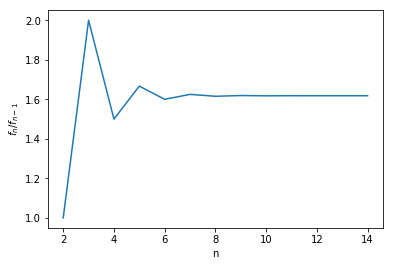

In [29]:
from matplotlib import pyplot as plt
%matplotlib inline
N=15
fn_ratio = np.zeros(N-2)
table = [None]*(N+1)
f50 = fib3(N, table)
for i in range(2,N):
    fn_ratio[i-2] = table[i]/table[i-1]
plt.plot(np.arange(2,N),fn_ratio)
plt.xlabel('n')
plt.ylabel(r"$f_{n}/f_{n-1}$")

•2) a) Use the iteration method, tabulation method,  and matrix method to calculate the time spent for different n (e.g. 1, 10, 100, 1000, 10000, ...uniform in the log space). 

b) For each method, output the time and n into a file

c) Read from the file and plot log(time) (y-axis) vs. log(n) (x-axis) for different methods

In [40]:
import time
logn = 6
time_file = open('lect2.txt','w')
for i in range(1,logn):
    n = 10**i
    print('--------n=%d--------' %(n))
    start_time = time.time()
    fib1(n)
    time_calc = time.time() - start_time
    time_file.write('iter %d %f\n' %(n,time_calc))
    print("Iteration method: %s seconds" % (time_calc))
    start_time = time.time()
    fib4(n)
    time_calc = time.time() - start_time
    time_file.write('tab %d %f\n' %(n,time_calc))
    print("Tabulation method: %s seconds" % (time_calc))
    start_time = time.time()
    fib5(n)
    time_calc = time.time() - start_time
    time_file.write('mat %d %f\n' %(n,time_calc))
    print("Matrix method: %s seconds" % (time_calc))
time_file.close()
#Iteration method can't deal with logn>4

--------n=10--------
Iteration method: 0.0 seconds
Tabulation method: 0.0 seconds
Matrix method: 0.0 seconds
--------n=100--------
Iteration method: 0.0 seconds
Tabulation method: 0.0 seconds
Matrix method: 0.0 seconds
--------n=1000--------
Iteration method: 0.0 seconds
Tabulation method: 0.0 seconds
Matrix method: 0.0 seconds
--------n=10000--------
Iteration method: 0.0 seconds
Tabulation method: 0.005984306335449219 seconds
Matrix method: 0.0 seconds
--------n=100000--------
Iteration method: 0.0 seconds


C:\Users\luojiawei\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: RuntimeWarning: overflow encountered in double_scalars
  after removing the cwd from sys.path.


Tabulation method: 0.44386816024780273 seconds
Matrix method: 0.0060024261474609375 seconds


['iter', '10', '0.000000']
['tab', '10', '0.000000']
['mat', '10', '0.000000']
['iter', '100', '0.000000']
['tab', '100', '0.000000']
['mat', '100', '0.000000']
['iter', '1000', '0.000000']
['tab', '1000', '0.000000']
['mat', '1000', '0.000000']
['iter', '10000', '0.000000']
['tab', '10000', '0.005984']
['mat', '10000', '0.000000']
['iter', '100000', '0.000000']
['tab', '100000', '0.443868']
['mat', '100000', '0.006002']


Text(0, 0.5, 'time(seconds)')

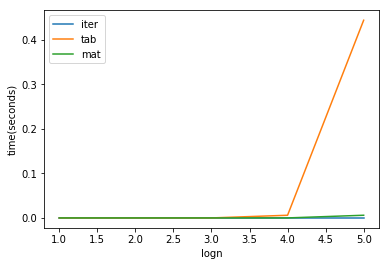

In [45]:
time_file = open('lect2.txt','r')
iter_time = np.zeros(logn-1)
tab_time = np.zeros(logn-1)
mat_time = np.zeros(logn-1)
for line in time_file.readlines():
    line = line.split()
    print(line)
    method = line[0]
    n = int(line[1])
    calc_time = float(line[2])
    if method == 'iter':
        iter_time[int(np.log10(n))-1] = calc_time
    elif method == 'tab':
        tab_time[int(np.log10(n))-1] = calc_time
    elif method == 'mat':
        mat_time[int(np.log10(n))-1] = calc_time
plt.plot(np.arange(1,logn),iter_time,label='iter')
plt.plot(np.arange(1,logn),tab_time,label='tab')
plt.plot(np.arange(1,logn),mat_time,label='mat')
plt.legend()
plt.xlabel('logn')
plt.ylabel('time(seconds)')